In [25]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot: >

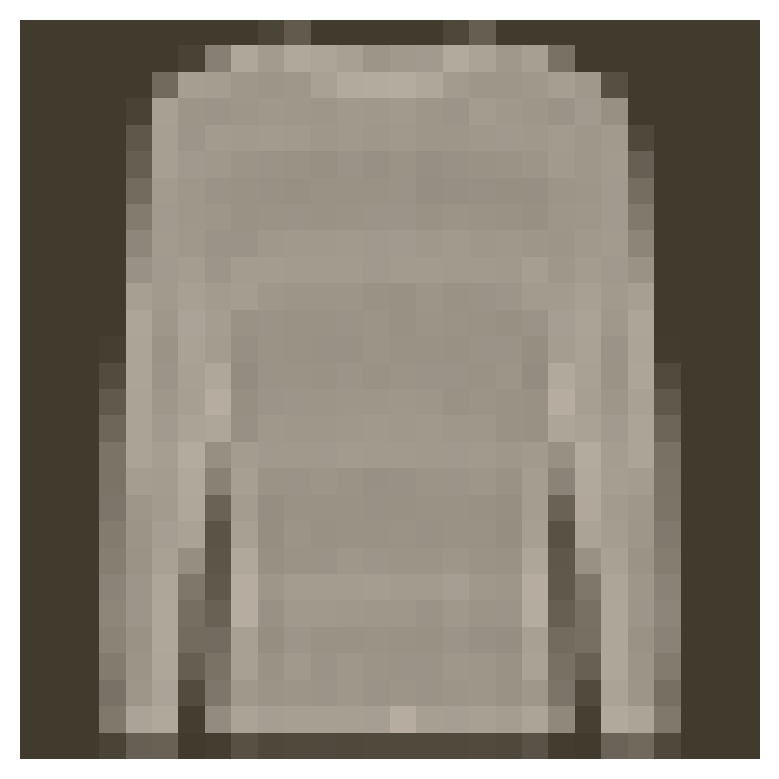

In [15]:
import helper
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [10]:
from torch import nn
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [16]:
from torch import optim
model = Classifier()
criterion=nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [12]:
epochs=5
for n in range(epochs):
    loss_number=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        loss_number+=loss.item()
    else:
        print(f"Training loss: {loss_number/len(trainloader)}")

Training loss: 1.0916316799644723
Training loss: 2.6381717733482817
Training loss: 2.9542712743348405
Training loss: 2.6606767406341616
Training loss: 2.6710090878675743


In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(img)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]